# **Pre-Processing**

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import array
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

In [0]:
train_data = pd.read_csv("train.csv")[:-2] #reading the csv files using pandas
test_data = pd.read_csv("test.csv")[:-2]

In [0]:
## Separating the X and Y variable

y = train_data['label']

## Dropping the variable 'label' from X variable 
X = train_data.drop(columns = 'label')

## Printing the size of data 
print(train_data.shape)
print(X)
print(y)

(41998, 785)
       pixel0  pixel1  pixel2  pixel3  ...  pixel780  pixel781  pixel782  pixel783
0           0       0       0       0  ...         0         0         0         0
1           0       0       0       0  ...         0         0         0         0
2           0       0       0       0  ...         0         0         0         0
3           0       0       0       0  ...         0         0         0         0
4           0       0       0       0  ...         0         0         0         0
...       ...     ...     ...     ...  ...       ...       ...       ...       ...
41993       0       0       0       0  ...         0         0         0         0
41994       0       0       0       0  ...         0         0         0         0
41995       0       0       0       0  ...         0         0         0         0
41996       0       0       0       0  ...         0         0         0         0
41997       0       0       0       0  ...         0         0         0  

In [0]:
## Normalization

X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (41998, 784)
test_data: (27998, 784)


In [0]:
# scaling the features
from sklearn.preprocessing import scale
X_scaled = scale(X)

# **LOGISTIC REGRESSION**

In [0]:
# train test split
X_train_lr1, X_test_lr1, y_train_lr1, y_test_lr1 = train_test_split(X, y, test_size = 0.8, train_size = 0.2 ,random_state = 10)

## **Logistic Regression - Use this (A = 89.39%)**

In [0]:
clf_lr1 = LogisticRegression(random_state=0,max_iter=1000).fit(X_train_lr1,y_train_lr1)

In [0]:
y_pred_lr1 = clf_lr1.predict(X_test_lr1)

In [0]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test_lr1, y_pred=y_pred_lr1), "\n")


accuracy: 0.8939671980731735 



## **Logisitc R - 2 (Bagging) - Don't use this. No change in performance but training time is increased**

In [0]:
# train test split
X_train_lr2, X_test_lr2, y_train_lr2, y_test_lr2 = train_test_split(X, y, test_size = 0.8, train_size = 0.2 ,random_state = 10)

In [0]:
clf_lr2=BaggingClassifier(base_estimator=LogisticRegression(max_iter=500),n_estimators=50).fit(X_train_lr2,y_train_lr2)

In [0]:
y_pred_lr2 = clf_lr1.predict(X_test_lr2)

In [0]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test_lr2, y_pred=y_pred_lr2), "\n")


accuracy: 0.8939671980731735 



# **RANDOM FOREST**

In [0]:
# train test split
X_train_dt1, X_test_dt1, y_train_dt1, y_test_dt1 = train_test_split(X, y, test_size = 0.8, train_size = 0.2 ,random_state = 10)

**Max Depth**

In [0]:
train_dt1 = np.tile(0., 30)
test_dt1 = np.tile(0., 30)
print("depth | Training score    | Testing score")
for i in range (1,30):
    print(i,end="   |   ")
    clf_dt1 = RandomForestClassifier(max_depth=i,n_estimators=1000)
    clf_dt1.fit(X_train_dt1, y_train_dt1)
    score1 = clf_dt1.score(X_train_dt1,y_train_dt1)
    train_dt1[i] = score1.mean()
    print(round(train_dt1[i],5), end = "         |  ")
    #clf_dt1.fit(X_test_dt1, y_test_dt1)
    score2 = clf_dt1.score(X_test_dt1,y_test_dt1)
    test_dt1[i] = score2.mean()
    print(round(test_dt1[i],5))




depth | Training score    | Testing score
1   |   0.52948         |  0.51824
2   |   0.66506         |  0.65334
3   |   0.76279         |  0.74441
4   |   0.82519         |  0.81024
5   |   0.88231         |  0.85451
6   |   0.92407         |  0.88502
7   |   0.95412         |  0.90314
8   |   0.97798         |  0.91731
9   |   0.99197         |  0.92574
10   |   0.99702         |  0.93153
11   |   0.99862         |  0.93526
12   |   0.99954         |  0.9364
13   |   0.99954         |  0.93801
14   |   0.99954         |  0.93801
15   |   1.0         |  0.93864
16   |   1.0         |  0.9387
17   |   1.0         |  0.93881
18   |   1.0         |  0.93853
19   |   1.0         |  0.9383
20   |   1.0         |  0.93944
21   |   1.0         |  0.93933
22   |   1.0         |  0.93881
23   |   1.0         |  0.93939
24   |   1.0         |  0.93996
25   |   1.0         |  0.94059
26   |   1.0         |  0.93875
27   |   1.0         |  0.93921
28   |   1.0         |  0.9391
29   |   1.0       

In [0]:
train_dt1=train_dt1[train_dt1!=0.]
test_dt1=test_dt1[test_dt1!=0.]
xaxis = array.array('i',(i for i in range(1,30)))

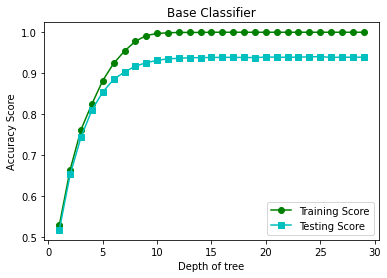

In [0]:
fig1, a = plt.subplots()
plt.plot(xaxis, train_dt1,'go-', Label='Training Score')
plt.plot(xaxis, test_dt1,'cs-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('Base Classifier')
legend = a.legend(loc='lower right')

**min_samples_split**

In [0]:
min_samples_splits = np.linspace(0.1, 1, 10, endpoint=True)

In [0]:
train_dt1_mss = np.tile(0., 100)
test_dt1_mss = np.tile(0., 100)
print("m_val | Training score    | Testing score")
i=0
for min_samples_split in min_samples_splits:
    print(round(min_samples_split,3),end="   |   ")
    clf_dt1 = RandomForestClassifier(max_depth=17,min_samples_split=min_samples_split, n_estimators=100)
    clf_dt1.fit(X_train_dt1, y_train_dt1)
    score1 = clf_dt1.score(X_train_dt1,y_train_dt1)
    train_dt1_mss[i] = score1.mean()
    print(round(train_dt1_mss[i],5), end = "         |  ")
    score2 = clf_dt1.score(X_test_dt1,y_test_dt1)
    test_dt1_mss[i] = score2.mean()
    print(round(test_dt1_mss[i],5))
    i+=1

m_val | Training score    | Testing score
0.1   |   0.77426         |  0.76092
0.2   |   0.70108         |  0.68804
0.3   |   0.60404         |  0.59634
0.4   |   0.56251         |  0.54886
0.5   |   0.54623         |  0.53068
0.6   |   0.52741         |  0.52099
0.7   |   0.11493         |  0.11142
0.8   |   0.11493         |  0.11142
0.9   |   0.11493         |  0.11142
1.0   |   0.11493         |  0.11142


In [0]:
train_dt1_mss=train_dt1_mss[train_dt1_mss!=0.]
test_dt1_mss=test_dt1_mss[test_dt1_mss!=0.]


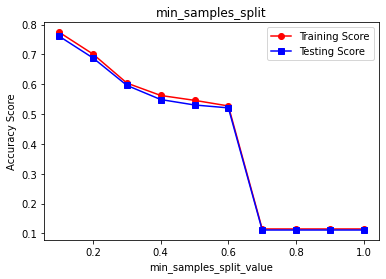

In [0]:
fig2, a2 = plt.subplots()
plt.plot(min_samples_splits, train_dt1_mss,'ro-', Label='Training Score')
plt.plot(min_samples_splits, test_dt1_mss,'bs-', Label = 'Testing Score')
plt.xlabel('min_samples_split_value')
plt.ylabel('Accuracy Score')
plt.title('min_samples_split')
legend = a2.legend(loc='upper right')

**min_samples_leaf**

In [0]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

In [0]:
train_dt1_msl = np.tile(0., 50)
test_dt1_msl = np.tile(0., 50)
print("m_val | Training score    | Testing score")
i=0
for min_samples_leaf in min_samples_leafs:
    print(round(min_samples_leaf,2),end="   |   ")
    clf_dt1 = RandomForestClassifier(max_depth=17,min_samples_leaf=min_samples_leaf, n_estimators=100)
    clf_dt1.fit(X_train_dt1, y_train_dt1)
    score1 = clf_dt1.score(X_train_dt1,y_train_dt1)
    train_dt1_msl[i] = score1.mean()
    print(round(train_dt1_msl[i],5), end = "         |  ")
    score2 = clf_dt1.score(X_test_dt1,y_test_dt1)
    test_dt1_msl[i] = score2.mean()
    print(round(test_dt1_msl[i],5))
    i+=1

m_val | Training score    | Testing score
0.1   |   0.68594         |  0.67387
0.2   |   0.56458         |  0.55161
0.3   |   0.52512         |  0.51508
0.4   |   0.11493         |  0.11142
0.5   |   0.11493         |  0.11142


In [0]:
train_dt1_msl=train_dt1_msl[train_dt1_msl!=0.]
test_dt1_msl=test_dt1_msl[test_dt1_msl!=0.]

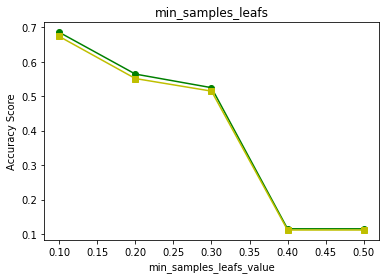

In [0]:
fig3, a3 = plt.subplots()
plt.plot(min_samples_leafs, train_dt1_msl,'go-', Label='Training Score')
plt.plot(min_samples_leafs, test_dt1_msl,'ys-', Label = 'Testing Score')
plt.xlabel('min_samples_leafs_value')
plt.ylabel('Accuracy Score')
plt.title('min_samples_leafs')
legend = a3.legend(loc='upper right')

## **Random Forest - 1 (Base): (A = 93.95%)**

In [0]:
clf_dt2 = RandomForestClassifier(n_estimators=1000)
clf_dt2.fit(X_train_dt1, y_train_dt1)
y_pred_dt2 = clf_dt2.predict(X_test_dt1)
clf_dt2.score(X_test_dt1,y_test_dt1)

0.9395572886798945

## **Random Forest - 2 (Depth=25): (A = 93.92%)**

In [0]:
clf_dt3 = RandomForestClassifier(max_depth=25,n_estimators=1000)
clf_dt3.fit(X_train_dt1, y_train_dt1)
y_pred_dt3 = clf_dt3.predict(X_test_dt1)
clf_dt3.score(X_test_dt1,y_test_dt1)

0.9392705585502925

## **Random Forest - 3 (leaf =0.01): (A = 92.16%)**

In [0]:
clf_dt4 = RandomForestClassifier(n_estimators=100,min_samples_leaf=0.001)
clf_dt4.fit(X_train_dt1, y_train_dt1)
y_pred_dt4 = clf_dt4.predict(X_test_dt1)
clf_dt4.score(X_test_dt1,y_test_dt1)


0.9216653285927285

## **Random Forest - 4 (split =0.01): (A = 93.22%)**

In [0]:
clf_dt5 = RandomForestClassifier(n_estimators=100,min_samples_split=0.001)
clf_dt5.fit(X_train_dt1, y_train_dt1)
y_pred_dt5 = clf_dt5.predict(X_test_dt1)
clf_dt5.score(X_test_dt1,y_test_dt1)


0.9322743433880032

## **Random Forest - 5 (split & leaf =0.01): (A = 92.33%)**

In [0]:
clf_dt6 = RandomForestClassifier(n_estimators=100,min_samples_leaf=0.001,min_samples_split=0.001)
clf_dt6.fit(X_train_dt1, y_train_dt1)
y_pred_dt6 = clf_dt6.predict(X_test_dt1)
clf_dt6.score(X_test_dt1,y_test_dt1)


0.9233283633444203

# **K-NEAREST NEIGHBOR**

In [0]:
# train test split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size = 0.8, train_size = 0.2 ,random_state = 10)



In [0]:
neighbors = array.array('i',(i for i in range(1,30)))

In [0]:
train_knn = np.tile(0., 50)
test_knn = np.tile(0., 50)
print("k_val | Training score    | Testing score")
i=0
for neighbor in neighbors:
    print(neighbor,end="   |   ")
    clf_knn =  KNeighborsClassifier(n_neighbors= neighbor,weights='distance')
    clf_knn.fit(X_train_knn, y_train_knn)
    score1 = clf_knn.score(X_train_knn,y_train_knn)
    train_knn[i] = score1.mean()
    print(round(train_knn[i],5), end = "         |  ")
    score2 = clf_knn.score(X_test_knn,y_test_knn)
    test_knn[i] = score2.mean()
    print(round(test_knn[i],5))
    i+=1


k_val | Training score    | Testing score
1   |   1.0         |  0.93176
2   |   1.0         |  0.93176
3   |   1.0         |  0.93348
4   |   1.0         |  0.93491
5   |   1.0         |  0.93055
6   |   1.0         |  0.93268
7   |   1.0         |  0.92843
8   |   1.0         |  0.92952
9   |   1.0         |  0.9243
10   |   1.0         |  0.92465
11   |   1.0         |  0.91949
12   |   1.0         |  0.91977
13   |   1.0         |  0.91794
14   |   1.0         |  0.91754
15   |   1.0         |  0.91501
16   |   1.0         |  0.91536
17   |   1.0         |  0.91278
18   |   1.0         |  0.91295
19   |   1.0         |  0.9114
20   |   1.0         |  0.91048
21   |   1.0         |  0.90922
22   |   1.0         |  0.90767
23   |   1.0         |  0.9059
24   |   1.0         |  0.90572
25   |   1.0         |  0.90417
26   |   1.0         |  0.90395
27   |   1.0         |  0.90251
28   |   1.0         |  0.90182
29   |   1.0         |  0.89959


In [0]:
train_knn=train_knn[train_knn!=0.]
test_knn=test_knn[test_knn!=0.]

In [0]:
xaxis = array.array('i',(i for i in range(1,30)))

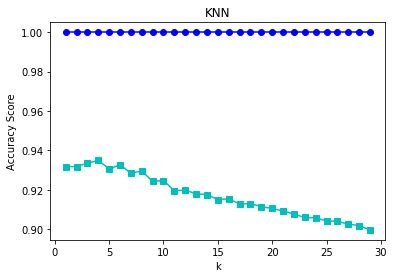

In [0]:
fig4, a4 = plt.subplots()
plt.plot(xaxis, train_knn,'bo-', Label='Training Score')
plt.plot(xaxis, test_knn,'cs-', Label = 'Testing Score')
plt.xlabel('k')
plt.ylabel('Accuracy Score')
plt.title('KNN')
legend = a2.legend(loc='lower right')

## **KNN - 1 - (k=4):   A = 95.09%**

In [0]:
clf_knn1 =  KNeighborsClassifier(n_neighbors= 4,weights='distance')

In [0]:
clf_knn1.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [0]:
y_pred_knn1 = clf_knn1.predict(X_test_knn)

In [0]:
clf_knn1.score(X_test_knn,y_test_knn)

0.9509211583678085

## **KNN - 2 - (k=6)*: A = 94.87%**

In [0]:
clf_knn2 =  KNeighborsClassifier(n_neighbors= 6,weights='distance')

In [0]:
clf_knn2.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

In [0]:
y_pred_knn2 = clf_knn2.predict(X_test_knn)

In [0]:
clf_knn2.score(X_test_knn,y_test_knn)

0.9487782374475431

## **KNN - 3 - (k=8) : A = 94.52%**

In [0]:
clf_knn3 =  KNeighborsClassifier(n_neighbors= 8,weights='distance')
clf_knn3.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='distance')

In [0]:
clf_knn3.score(X_test_knn,y_test_knn)

0.9452662281615525

In [0]:
y_pred_knn3 = clf_knn3.predict(X_test_knn)

## **KNN -4 (k=4 & no distance parameter) ; A=94.31%**

In [0]:
clf_knn4 =  KNeighborsClassifier(n_neighbors= 4)
clf_knn4.fit(X_train_knn, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
clf_knn4.score(X_test_knn,y_test_knn)

0.9431828328224054

In [0]:
y_pred_knn4 = clf_knn4.predict(X_test_knn)

# **NAIVE BAYES**

## **Naive Bayes 1 - (alpha =0.001) : A=82.93%**

In [0]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X, y, test_size = 0.8, train_size = 0.2 ,random_state = 10)


In [0]:
clf_nb = MultinomialNB(alpha=0.0001)
clf_nb.fit(X_train_nb, y_train_nb)#training the model

MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)

In [0]:
clf_nb.score(X_test_nb,y_test_nb)

0.8293103961427424

In [0]:
y_pred_nb = clf_nb.predict(X_test_nb)

# **XG BOOST**

In [0]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size = 0.8, train_size = 0.2 ,random_state = 10)

max_depth

In [0]:
train_xgb_md = np.tile(0., 30)
test_xgb_md = np.tile(0., 30)
print("depth | Training score    | Testing score")
for i in range (1,30):
    print(i,end="   |   ")
    clf_xgb_md = xgb.XGBClassifier(n_estimators=100,max_depth=i)
    clf_xgb_md.fit(X_train_xgb, y_train_xgb)
    score1 = clf_xgb_md.score(X_train_xgb,y_train_xgb)
    train_xgb_md[i] = score1.mean()
    print(round(train_xgb_md[i],4), end = "         |  ")
    score2 = clf_xgb_md.score(X_test_xgb,y_test_xgb)
    test_xgb_md[i] = score2.mean()
    print(round(test_xgb_md[i],4))


depth | Training score    | Testing score
1   |   0.844         |  0.8288
2   |   0.922         |  0.8929
3   |   0.9699         |  0.9243
4   |   0.9965         |  0.9403
5   |   0.9998         |  0.9467
6   |   1.0         |  0.9472
7   |   1.0         |  0.9467
8   |   1.0         |  0.9455
9   |   1.0         |  0.9464
10   |   1.0         |  0.9467
11   |   1.0         |  0.9459
12   |   1.0         |  0.9454
13   |   1.0         |  0.945
14   |   1.0         |  0.9458
15   |   1.0         |  0.9453
16   |   1.0         |  0.9456
17   |   1.0         |  0.9451
18   |   1.0         |  0.9454
19   |   1.0         |  0.9449
20   |   1.0         |  0.9451
21   |   1.0         |  0.9449
22   |   1.0         |  0.9454
23   |   1.0         |  0.9454
24   |   1.0         |  0.9447
25   |   1.0         |  0.9454
26   |   1.0         |  0.9449
27   |   1.0         |  0.9458
28   |   1.0         |  0.9458
29   |   1.0         |  0.9458


Depth = 6,5,9

In [0]:
train_xgb_md=train_xgb_md[train_xgb_md!=0.]
test_xgb_md=test_xgb_md[test_xgb_md!=0.]
xaxis = array.array('i',(i for i in range(1,30)))

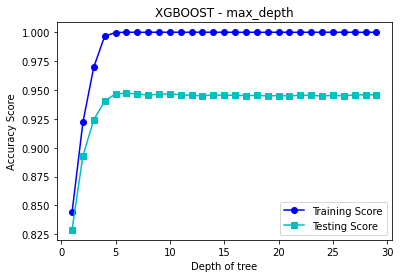

In [0]:
fig4, a4 = plt.subplots()
plt.plot(xaxis, train_xgb_md,'bo-', Label='Training Score')
plt.plot(xaxis, test_xgb_md,'cs-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('XGBOOST - max_depth')
legend = a4.legend(loc='lower right')

learning_rate

In [0]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [0]:
train_xgb_lr = np.tile(0., 30)
test_xgb_lr = np.tile(0., 30)
print("l_rate | Training score    | Testing score")
i=0
for lr in learning_rate:
    print(lr,end="   |   ")
    clf_xgb_lr = xgb.XGBClassifier(n_estimators=100,learning_rate=lr)
    clf_xgb_lr.fit(X_train_xgb, y_train_xgb)
    score1 = clf_xgb_lr.score(X_train_xgb,y_train_xgb)
    train_xgb_lr[i] = score1.mean()
    print(round(train_xgb_lr[i],4), end = "         |  ")
    score2 = clf_xgb_lr.score(X_test_xgb,y_test_xgb)
    test_xgb_lr[i] = score2.mean()
    print(round(test_xgb_lr[i],4))
    i+=1


l_rate | Training score    | Testing score
0.0001   |   0.7338         |  0.711
0.001   |   0.7533         |  0.733
0.01   |   0.8537         |  0.8272
0.1   |   0.9699         |  0.9243
0.2   |   0.9975         |  0.9414
0.3   |   1.0         |  0.9469
0.4   |   1.0         |  0.9501
0.5   |   1.0         |  0.9512
0.6   |   1.0         |  0.9498
0.7   |   1.0         |  0.949
0.8   |   1.0         |  0.9483
0.9   |   1.0         |  0.9464
1   |   1.0         |  0.945


In [0]:
train_xgb_lr=train_xgb_lr[train_xgb_lr!=0.]
test_xgb_lr=test_xgb_lr[test_xgb_lr!=0.]
xaxis = array.array('i',(i for i in range(1,30)))

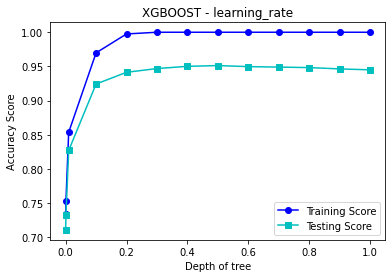

In [0]:
fig5, a5 = plt.subplots()
plt.plot(learning_rate, train_xgb_lr,'bo-', Label='Training Score')
plt.plot(learning_rate, test_xgb_lr,'cs-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('XGBOOST - learning_rate')
legend = a5.legend(loc='lower right')

## **XG Boost 1 - (d=6) ; A = 94.72 %**

In [0]:
clf_xgb1= xgb.XGBClassifier(n_estimators=100,max_depth=6)

In [0]:
clf_xgb1.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
clf_xgb1.score(X_test_xgb,y_test_xgb)

0.9472008095479032

In [0]:
pred_xgb1 = clf_xgb1.predict(X_test_xgb)

## **XG Boost 2 - (d=5) ; A = 94.66 %**

In [0]:
clf_xgb2= xgb.XGBClassifier(n_estimators=100,max_depth=5)

In [0]:
clf_xgb2.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
clf_xgb2.score(X_test_xgb,y_test_xgb)

0.9466650793178368

In [0]:
pred_xgb2 = clf_xgb2.predict(X_test_xgb)

## **XG Boost 3 - (d=9) ; A = 94.63 %**

In [0]:
clf_xgb3= xgb.XGBClassifier(n_estimators=100,max_depth=9)

In [0]:
clf_xgb3.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
clf_xgb3.score(X_test_xgb,y_test_xgb)

0.9463674514122444

In [0]:
pred_xgb3 = clf_xgb3.predict(X_test_xgb)

## **XG Boost 4 - (lr= 0.6) ; A = 94.97 %**

In [0]:
clf_xgb4= xgb.XGBClassifier(n_estimators=100,learning_rate=0.6)
clf_xgb4.fit(X_train_xgb, y_train_xgb)
pred_xgb4 = clf_xgb4.predict(X_test_xgb)
clf_xgb4.score(X_test_xgb,y_test_xgb)

0.949760409535998

## **XG Boost 5 - (lr= 0.7 ) ; A = 94.90%**

In [0]:
clf_xgb5= xgb.XGBClassifier(n_estimators=100,learning_rate=0.7)
clf_xgb5.fit(X_train_xgb, y_train_xgb)
pred_xgb5 = clf_xgb5.predict(X_test_xgb)
clf_xgb5.score(X_test_xgb,y_test_xgb)

0.9490461025625763

## **XG Boost 6 - (dep=6,lr=0.6)  ; A = 94.81 %**

In [0]:
clf_xgb6= xgb.XGBClassifier(n_estimators=100,learning_rate=0.6,max_depth=6)
clf_xgb6.fit(X_train_xgb, y_train_xgb)
pred_xgb6 = clf_xgb6.predict(X_test_xgb)
clf_xgb6.score(X_test_xgb,y_test_xgb)



0.948153218845799

# **LIGHT GBM**

In [0]:
from lightgbm import LGBMClassifier

In [0]:
X_train_lgbm, X_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(X, y, test_size = 0.8, train_size = 0.2 ,random_state = 10)

learning_rate

In [0]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [0]:
train_lgbm_lr = np.tile(0., 30)
test_lgbm_lr = np.tile(0., 30)
print("l_rate | Training score    | Testing score")
i=0
for lr in learning_rate:
    print(lr,end="   |   ")
    clf_lgbm_lr = LGBMClassifier(n_estimators=1000,learning_rate=lr)
    clf_lgbm_lr.fit(X_train_lgbm, y_train_lgbm)
    score1 = clf_lgbm_lr.score(X_train_lgbm,y_train_lgbm)
    train_lgbm_lr[i] = score1.mean()
    print(round(train_lgbm_lr[i],4), end = "         |  ")
    score2 = clf_lgbm_lr.score(X_test_lgbm,y_test_lgbm)
    test_lgbm_lr[i] = score2.mean()
    print(round(test_lgbm_lr[i],4))
    i+=1

l_rate | Training score    | Testing score
0.0001   |   0.8711         |  0.8071
0.001   |   0.9602         |  0.9042
0.01   |   1.0         |  0.9521
0.1   |   1.0         |  0.9609
0.2   |   1.0         |  0.9611
0.3   |   1.0         |  0.9592
0.4   |   1.0         |  0.9594
0.5   |   1.0         |  0.9572
0.6   |   1.0         |  0.9579
0.7   |   1.0         |  0.9557
0.8   |   1.0         |  0.9537
0.9   |   1.0         |  0.9524
1   |   0.2372         |  0.2357


In [0]:
train_lgbm_lr=train_lgbm_lr[train_lgbm_lr!=0.]
test_lgbm_lr=test_lgbm_lr[test_lgbm_lr!=0.]

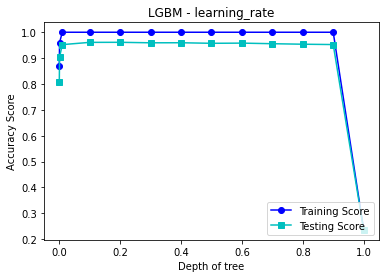

In [0]:
fig6, a6 = plt.subplots()
plt.plot(learning_rate, train_lgbm_lr,'bo-', Label='Training Score')
plt.plot(learning_rate, test_lgbm_lr,'cs-', Label = 'Testing Score')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy Score')
plt.title('LGBM - learning_rate')
legend = a6.legend(loc='lower right')

## **LGBM BASIC ; A = 96.08 %**

In [0]:
clf_lgbm= LGBMClassifier(n_estimators=1000)
clf_lgbm.fit(X_train_lgbm, y_train_lgbm)
#pred_lgbm = clf_lgbm.predict(X_test_lgbm)
clf_lgbm.score(X_test_lgbm,y_test_lgbm)

0.9608619304145957

## **LGBM 1: (lr= 0.1) ; A = 96.08**

In [0]:
clf_lgbm1= LGBMClassifier(n_estimators=100,learning_rate=0.1)
clf_lgbm1.fit(X_train_lgbm, y_train_lgbm)
#pred_lgbm1 = clf_lgbm.predict(X_test_lgbm)
clf_lgbm1.score(X_test_lgbm,y_test_lgbm)



0.9517842792940266

## **LGBM 2: (lr= 0.2 ) ; A = 96.11%**

In [0]:
clf_lgbm2= LGBMClassifier(n_estimators=1000,learning_rate=0.2)
clf_lgbm2.fit(X_train_lgbm, y_train_lgbm)
#pred_lgbm2 = clf_lgbm.predict(X_test_lgbm)
clf_lgbm2.score(X_test_lgbm,y_test_lgbm)




0.9611000327390696

## **LGBM 3: (lr= 0.3 ) ; A = 95.93%**

In [0]:
clf_lgbm3= LGBMClassifier(n_estimators=100,learning_rate=0.3)
clf_lgbm3.fit(X_train_lgbm, y_train_lgbm)
pred_lgbm3 = clf_lgbm.predict(X_test_lgbm)
clf_lgbm3.score(X_test_lgbm,y_test_lgbm)




0.9593737908866335

## **LGBM 4: (lr= 0.4 ) ; A = 95.94%**

In [0]:
clf_lgbm4= LGBMClassifier(n_estimators=100,learning_rate=0.4)
clf_lgbm4.fit(X_train_lgbm, y_train_lgbm)
#pred_lgbm4 = clf_lgbm.predict(X_test_lgbm)
clf_lgbm4.score(X_test_lgbm,y_test_lgbm)




0.9594035536771928

## **LGBM 5: (lr= 0.6 ) ; A = 95.84%**

In [0]:
clf_lgbm5= LGBMClassifier(n_estimators=100,learning_rate=0.6)
clf_lgbm5.fit(X_train_lgbm, y_train_lgbm)
#pred_lgbm5 = clf_lgbm.predict(X_test_lgbm)
clf_lgbm5.score(X_test_lgbm,y_test_lgbm)




0.9584809071698562